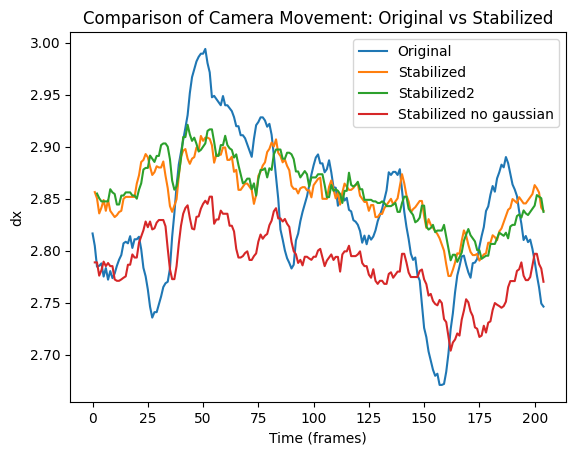

In [12]:
import os
import json
import matplotlib.pyplot as plt

def load_camera_movement_data(filepath):
    with open(filepath, "r") as infile:
        camera_movement_data = json.load(infile)
    return camera_movement_data

def plot_camera_movement_data(original_file, stabilized_file, stabilized2_file):
    original_data = load_camera_movement_data(original_file)
    stabilized_data = load_camera_movement_data(stabilized_file)
    stabilized2_data = load_camera_movement_data(stabilized2_file)

    original_dx_list = [x[0] for x in original_data]
    stabilized_dx_list = [x[0] for x in stabilized_data]
    stabilized2_dx_list = [x[0] for x in stabilized2_data]

    time_list = list(range(len(original_dx_list)))

    plt.plot(time_list, original_dx_list, label='Original')
    plt.plot(time_list[1:], stabilized_dx_list, label='Stabilized')
    plt.plot(time_list[2:], stabilized2_dx_list, label='Stabilized2')

    plt.xlabel("Time (frames)")
    plt.ylabel("dx")
    plt.title("Comparison of Camera Movement: Original vs Stabilized")
    plt.legend()
    plt.show()

path = "//sf3.bss.phy.private.cam.ac.uk/cicutagroup/yz655/camera_shake_detection/videos/"
original_file = path+'rescale_crop_fps10_DJI_0047_camera_movement_data.txt'
stabilized_file = path+'stabilized_rescale_crop_fps10_DJI_0047_camera_movement_data.txt'
stabilized2_file = path+'stable_stabilized_rescale_crop_fps10_DJI_0047_camera_movement_data.txt'
stabilized_without_gaussian_file = path+'stable_without_gaussian_rescale_crop_fps10_DJI_0047_camera_movement_data.txt'

original_data = load_camera_movement_data(original_file)
stabilized_data = load_camera_movement_data(stabilized_file)
stabilized2_data = load_camera_movement_data(stabilized2_file)
stabilized_without_gaussian_data = load_camera_movement_data(stabilized_without_gaussian_file)

original_dx_list = [x[0] for x in original_data]
stabilized_dx_list = [x[0] for x in stabilized_data]
stabilized2_dx_list = [x[0] for x in stabilized2_data]
stabilized_without_gaussian_dx_list = [x[0] for x in stabilized_without_gaussian_data]

time_list = list(range(len(original_dx_list)))

plt.plot(time_list, original_dx_list, label='Original')
plt.plot(time_list[1:], stabilized_dx_list, label='Stabilized')
plt.plot(time_list[2:], stabilized2_dx_list, label='Stabilized2')
plt.plot(time_list[1:], stabilized_without_gaussian_dx_list, label='Stabilized no gaussian')

plt.xlabel("Time (frames)")
plt.ylabel("dx")
plt.title("Comparison of Camera Movement: Original vs Stabilized")
plt.legend()
plt.show()


C:\Users\46596\AppData\Local\Temp\ipykernel_27768\1884724070.py:42: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([line1, line2],     # The line objects
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


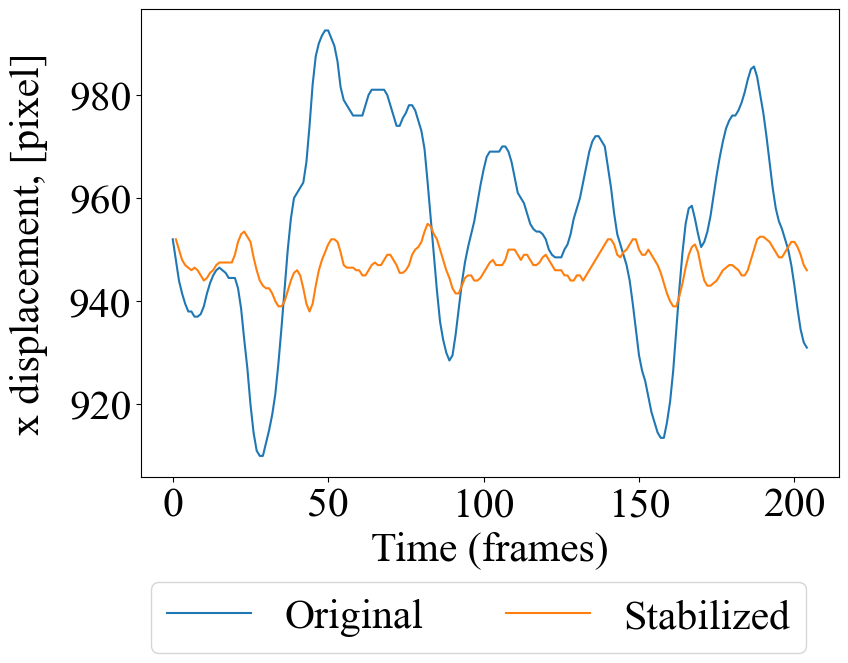

In [5]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
fontsize = 30
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['axes.labelsize'] = fontsize
mpl.rcParams['xtick.labelsize'] = fontsize
mpl.rcParams['ytick.labelsize'] = fontsize

def load_camera_movement_data(filepath):
    with open(filepath, "r") as infile:
        camera_movement_data = json.load(infile)
    return camera_movement_data

path = "//sf3.bss.phy.private.cam.ac.uk/cicutagroup/yz655/camera_shake_detection/videos/"
original_file = path+'rescale_crop_fps10_DJI_0047_camera_movement_data.txt'
stabilized_file = path+'stabilized_rescale_crop_fps10_DJI_0047_camera_movement_data.txt'

original_data = load_camera_movement_data(original_file)
stabilized_data = load_camera_movement_data(stabilized_file)

original_dx_list = [x[2] for x in original_data]
stabilized_dx_list = [x[2] for x in stabilized_data]

time_list = list(range(len(original_dx_list)))

fig, ax = plt.subplots(figsize=(9, 6))

line1, = ax.plot(time_list, original_dx_list, label='Original')
line2, = ax.plot(time_list[1:], stabilized_dx_list, label='Stabilized')

ax.set_xlabel("Time (frames)", fontsize=fontsize)
ax.set_ylabel("x displacement, [pixel]", fontsize=fontsize)
ax.yaxis.labelpad = 15  # Add padding to the y label

legend_labels = ['Original', 'Stabilized']

fig.legend([line1, line2],     # The line objects
           labels=legend_labels,   # The labels for each line
           loc="lower center",   # Position of legend
           bbox_to_anchor=(0.5, -0.2),  # Position legend relative to figure
           borderaxespad=0.1,    # Add little spacing around the legend box
           ncol=2
           )

# Adjust the layout so everything fits
plt.subplots_adjust(bottom=0.1)  # Adjust the bottom margin to make space for the legend

# Save the figure to .eps format
plt.savefig('C:\\Users\\46596\\Desktop\\Multi DDM\\camera_shake_paper_figs\\stabilize_quality.eps', format='eps', bbox_inches='tight')
plt.show()


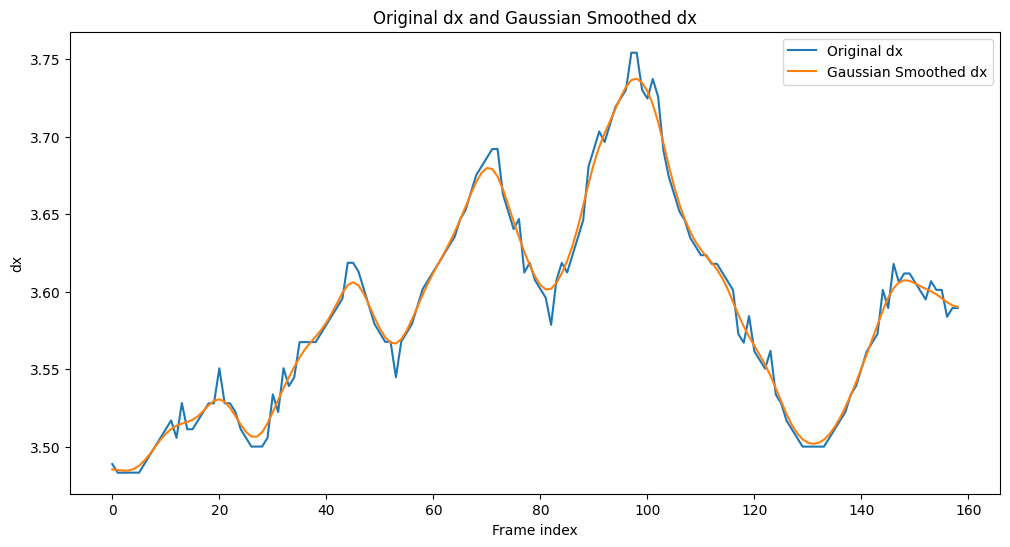

In [16]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# path = "//sf3.bss.phy.private.cam.ac.uk/cicutagroup/yz655/camera_shake_detection/videos/"
# original_file = path + 'rescale_crop_fps10_DJI_0047_camera_movement_data.txt'

path = "//sf3.bss.phy.private.cam.ac.uk/cicutagroup/yz655/camera_shake_detection/drone_scale_bar_videos_movement_data/"
original_file = path + 'scalebar_fps10_DJI_0046_camera_movement_data.txt'

# Load camera movement data
with open(original_file, "r") as infile:
    camera_movement_data = json.load(infile)

# Extract dx_list
dx_list = [x[0] for x in camera_movement_data]

# Apply Gaussian smoothing
sigma = 2
smoothed_dx_list = gaussian_filter1d(dx_list, sigma)

# Plot dx_list and smoothed_dx_list
plt.figure(figsize=(12, 6))
plt.plot(dx_list, label='Original dx')
plt.plot(smoothed_dx_list, label='Gaussian Smoothed dx')
plt.xlabel('Frame index')
plt.ylabel('dx')
plt.legend()
plt.title('Original dx and Gaussian Smoothed dx')
plt.show()
